<a href="https://colab.research.google.com/github/anoopjakob/ML_Lab_assignment_4/blob/main/ML_Lab_assignment_4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

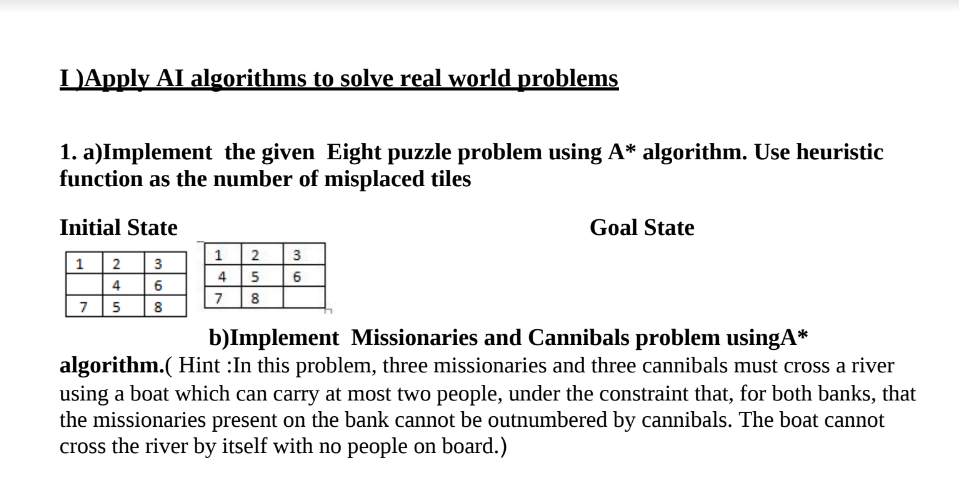

In [192]:
import numpy as np

In [193]:
# to store the movement of space on all the 9 positions
value_dict = {
    0 : [1,3],
    1 : [0,2,4],
    2 : [1,5],
    3 : [0,4,6],
    4 : [1,3,5,7],
    5 : [2,4,8],
    6 : [3,7],
    7 : [4,6,8],
    8 : [5,7]
}

In [237]:
# function to exchange the values according to zero space
def exchange(array,index1, index2):
  temp_array = array
  temp = temp_array[index1]
  temp_array[index1] = temp_array[index2]
  temp_array[index2] = temp
  return temp_array


# function to create the children 
def create_children(data):
  List = data.tolist()
  # find the position of empy space
  index_of_zero = List.index(0)
  print('index of zero : ', index_of_zero)
  exchange_index_list = value_dict[index_of_zero]
  print('exchange index list :', exchange_index_list)
  children_lists=[]
  # temp_list= List
 
  for i in range(len(exchange_index_list)):
    temp_list = List[:]
    new_list = exchange(temp_list, exchange_index_list[i], index_of_zero)
    children_lists.append(new_list)
  # print('total children list:', children_lists)
  return children_lists


def no_of_misplaced_tiles(current_data, goal_state_data):
  count = 0
  for i in range(9):
    
    if current_data[i] != goal_state_data[i] and current_data[i] != 0:
      count+=1
  # c = np.array(current_data)
  # g = np.array(goal_state_data)
  # misplaced = c-g
  # # no of misplaced tiles 
  # count=0
  # for i in misplaced:
  #   if i !=0:
  #     count=count+1
  return count


def best_child(list_of_lists, goal_state_data, best_children_list,node):
  cost = 200 # assigning a big value 
  
  for children in list_of_lists:
    x = no_of_misplaced_tiles(children, goal_state_data) + node
  
    print('h values are ', x)
    # print('best children list', best_children_list)
    list1.append(x)
    if x < cost:
      heuristic_value = x
      cost = x+node
      best_c = children 
  
        # best_children_list = best_children_list.append(best_children)
        # best_children = children.extend(node)
    
  return heuristic_value,cost, best_c


In [240]:
f_n, g_n, h_n, node_level = 0,0,0,0

start_state = np.array([1,0,3,4,2,5,7,8,6])
# start_state = np.array([3,4,1,2,5,6,7,0,8])
goal_state  = np.array([1,2,3,4,5,6,7,8,0])
previous_state=[]
all_children_database = []

current_state = start_state
best_children_list = start_state
for i in range(10):
  x = no_of_misplaced_tiles(current_state, goal_state)
  if x != 0:
    # find childrens of current state
    print('Node_level: ', node_level)
    children = create_children(current_state)
    print('children :' , children)
    

    all_children_database += children
    # print('all children: ', all_children_database)
    h, cost, best_children = best_child(children, goal_state, best_children_list , node_level)
    # print('heruistic value: ', h)

    
    print('best children : {},   cost {}'.format(best_children, cost))

    print('-----------')
    node_level +=1
    current_state = np.array(best_children)
  else:
    print('goal reached', current_state)
    break

Node_level:  0
index of zero :  1
exchange index list : [0, 2, 4]
children : [[0, 1, 3, 4, 2, 5, 7, 8, 6], [1, 3, 0, 4, 2, 5, 7, 8, 6], [1, 2, 3, 4, 0, 5, 7, 8, 6]]
h values are  4
h values are  4
h values are  2
best children : [1, 2, 3, 4, 0, 5, 7, 8, 6],   cost 2
-----------
Node_level:  1
index of zero :  4
exchange index list : [1, 3, 5, 7]
children : [[1, 0, 3, 4, 2, 5, 7, 8, 6], [1, 2, 3, 0, 4, 5, 7, 8, 6], [1, 2, 3, 4, 5, 0, 7, 8, 6], [1, 2, 3, 4, 8, 5, 7, 0, 6]]
h values are  4
h values are  4
h values are  2
h values are  4
best children : [1, 2, 3, 4, 5, 0, 7, 8, 6],   cost 3
-----------
Node_level:  2
index of zero :  5
exchange index list : [2, 4, 8]
children : [[1, 2, 0, 4, 5, 3, 7, 8, 6], [1, 2, 3, 4, 0, 5, 7, 8, 6], [1, 2, 3, 4, 5, 6, 7, 8, 0]]
h values are  4
h values are  4
h values are  2
best children : [1, 2, 3, 4, 5, 6, 7, 8, 0],   cost 4
-----------
goal reached [1 2 3 4 5 6 7 8 0]
